In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import sparse
import anndata
import warnings
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import tempfile
import os
from scipy import stats
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/rpy2/rinterface/__init__.py:1211: UserWarning: Environment variable "PWD" redefined by R and overriding existing variable. Current: "/", R: "/Users/siyuanzhao/Documents/GitHub/Biovis2025/Python"
  warnings.warn(
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/rpy2/rinterface/__init__.py:1211: UserWarning: Environment variable "R_SESSION_TMPDIR" redefined by R and overriding existing variable. Current: "/var/folders/pm/_db3z8953vb1gtk99jkk_sb80000gn/T//RtmpHiCmH6", R: "/var/folders/pm/_db3z8953vb1gtk99jkk_sb80000gn/T//Rtmp2xWKX4"
  warnings.warn(


In [2]:
cell_ids = [
    "69561",
    "69807",
    "70387",
    "70550",
    "70737",
    "71713",
    "77354",
    "77386",
    "77388",
    "77389",
    "77390",
    "77395",
    "77397",
    "77406",
    "77418",
    "77428",
    "77436",
    "77440",
    "77454",
    "77463",
    "77499",
    "77503",
    "77504",
    "77520",
    "77522",
    "77529",
    "77533",
    "77552",
    "77559",
    "77562",
    "77564",
    "77565",
    "77580",
    "77581",
    "77589",
    "77594",
    "77598",
    "77611",
    "77621",
    "77637",
    "77648",
    "77650",
    "77694",
    "77696",
    "77698",
    "77710",
    "77725",
    "77729",
    "77745",
    "77749",
    "77750",
    "77752",
    "77755",
    "77773",
    "77784",
    "77785",
    "77788",
    "77814",
    "77815",
    "77820",
    "77827",
    "77832",
    "77837",
    "77847",
    "77849",
    "77860",
    "77862",
    "77866",
    "77885",
    "77887",
    "77897",
    "77908",
    "77923",
    "77927",
    "77950",
    "77955",
    "77985",
    "77988",
    "77992",
    "77993",
    "77996",
    "77997",
    "78006",
    "78031",
    "78042",
    "78047",
    "78052",
    "78070",
    "78089",
    "78091",
    "78100",
    "78135",
    "78138",
    "78143",
    "78146",
    "78148",
    "78171",
    "78180",
    "78189",
    "78191",
    "78203",
    "78207",
    "78211",
    "78227",
    "78231",
    "78243",
    "78252",
    "78254",
    "78261",
    "78276",
    "78283",
    "78297",
    "78329",
    "78338",
    "78347",
    "78350",
    "78362",
    "78375",
    "78387",
    "78414",
    "78415",
    "78427",
    "78435",
    "78447",
    "78453",
    "78460",
    "78467",
    "78469",
    "78475",
    "78476",
    "78485",
    "78498",
    "78505",
    "78514",
    "78528",
    "78547",
    "78562",
    "78565",
    "78584",
    "78615",
    "78620",
    "78639",
    "78658",
    "78685",
    "78694",
    "78695",
    "78697",
    "78710",
    "78712",
    "78716",
    "78719",
    "78728",
    "78741",
    "78748",
    "78781",
    "78783",
    "78798",
    "78816",
    "78843",
    "78851",
    "78857",
    "78865",
    "78867",
    "78871",
    "78872",
    "78875",
    "78879",
    "78880",
    "78898",
    "78902",
    "78905",
    "78909",
    "78922",
    "78924",
    "78927",
    "78928",
    "78938",
    "78945",
    "78951",
    "78953",
    "78962",
    "78980",
    "78984",
    "78991",
    "78997",
    "79006",
    "79011",
    "79021",
    "79023",
    "79042",
    "79070",
    "79075",
    "79096",
    "79129",
    "79158",
    "79164",
    "79165",
    "79166",
    "79173",
    "79197",
    "79201",
    "79232",
    "79233",
    "79239",
    "79251",
    "79254",
    "79265",
    "79270",
    "79297",
    "79306",
    "79308",
    "79340",
    "79358",
    "79368",
    "79369",
    "79377",
    "79387",
    "79398",
    "79407",
    "79417",
    "79421",
    "79446",
    "79451",
    "79460",
    "79461",
    "79485",
    "79486",
    "79491",
    "79495",
    "79514",
    "79516",
    "79528",
    "79530",
    "79538",
    "79556",
    "79560",
    "79561",
    "79577",
    "79582",
    "79583",
    "79595",
    "79628",
    "79650",
    "79660",
    "79667",
    "79690",
    "79702",
    "79717",
    "79718",
    "79738",
    "79749",
    "79754",
    "79757",
    "79761",
    "79768",
    "79778",
    "79784",
    "79785",
    "79795",
    "79800",
    "79813",
    "79838",
    "79840",
    "79841",
    "79845",
    "79848",
    "79856",
    "79859",
    "79860",
    "79863",
    "79890",
    "79898",
    "79909",
    "79912",
    "79919",
    "79921",
    "79943",
    "79949",
    "79964",
    "79971",
    "79982",
    "79994",
    "79997",
    "79999",
    "80004",
    "80010",
    "80013",
    "80018",
    "80023",
    "80029",
    "80037",
    "80043",
    "80049",
    "80070",
    "80073",
    "80081",
    "80082",
    "80115",
    "80116",
    "80119",
    "80123",
    "80131",
    "80151",
    "80159",
    "80167",
    "80211",
    "80217",
    "80218",
    "80232",
    "80237",
    "80246",
    "80259",
    "80271",
    "80290",
    "80294",
    "80300",
    "80310",
    "80323",
    "80381",
    "80384",
    "80398",
    "80414",
    "80425",
    "80440",
    "80463",
    "80495",
    "80510",
    "80522",
    "80526",
    "80548",
    "80553",
    "80579",
    "80581",
    "80592",
    "80612",
    "80633",
    "80638",
    "80651",
    "80660",
    "80668",
    "80689",
    "80712",
    "80721",
    "80743",
    "80753",
    "80766",
    "80777",
    "80794",
    "80817",
    "80837",
    "80850",
    "80866",
    "80869",
    "80875",
    "80930",
    "80950",
    "80959",
    "80967",
    "80973",
    "81013",
    "81016",
    "81022",
    "81023",
    "81028",
    "81039",
    "81051",
    "81058",
    "81060",
    "81064",
    "81070",
    "81092",
    "81106",
    "81108",
    "81135",
    "81138",
    "81142",
    "81154",
    "81172",
    "81184",
    "81186",
    "81243",
    "81264",
    "81267",
    "81273",
    "81288",
    "81293",
    "81327",
    "81339",
    "81352",
    "81394",
    "81411",
    "81430",
    "81443",
    "81444",
    "81451",
    "81452",
    "81460",
    "81465",
    "81481",
    "81483",
    "81529",
    "81554",
    "81563",
    "81564",
    "81616",
    "81640",
    "81700",
    "81705",
    "81715",
    "81720",
    "81736",
    "81737",
    "81750",
    "81769",
    "81783",
    "81802",
    "81825",
    "81844",
    "81845",
    "81847",
    "81859",
    "81869",
    "81870",
    "81884",
    "81907",
    "81914",
    "81941",
    "81988",
    "82022",
    "82028",
    "82043",
    "82065",
    "82079",
    "82081",
    "82091",
    "82096",
    "82131",
    "82142",
    "82143",
    "82170",
    "82176",
    "82187",
    "82207",
    "82215",
    "82226",
    "82227",
    "82232",
    "82293",
    "82314",
    "82323",
    "82364",
    "82369",
    "82387",
    "82390",
    "82394",
    "82414",
    "82424",
    "82458",
    "82469",
    "82508",
    "82518",
    "82528",
    "82540",
    "82543",
    "82573",
    "82603",
    "82651",
    "82672",
    "82681",
    "82684",
    "82689",
    "82693",
    "82719",
    "82748",
    "82751",
    "82753",
    "82763",
    "82767",
    "82777",
    "82786",
    "82804",
    "82815",
    "82824",
    "82839",
    "82846",
    "82849",
    "82855",
    "82857",
    "82895",
    "82905",
    "82912",
    "82915",
    "82933",
    "82939",
    "82941",
    "82957",
    "83003",
    "83019",
    "83024",
    "83025",
    "83027",
    "83046",
    "83056",
    "83064",
    "83084",
    "83092",
    "83199",
    "83212",
    "83256",
    "83322",
    "83329",
    "83371",
    "83384",
    "83386",
    "83390",
    "83420",
    "83461",
    "83466",
    "83520",
    "83553",
    "83561",
    "83580",
    "83581",
    "83588",
    "83589",
    "83598",
    "83610",
    "83619",
    "83645",
    "83688",
    "83711",
    "83731",
    "83741",
    "83749",
    "83763",
    "83776",
    "83779",
    "83789",
    "83813",
    "83822",
    "83836",
    "83852",
    "83853",
    "83865",
    "83868",
    "83878",
    "83903",
    "83914",
    "83921",
    "83956",
    "83970",
    "84041",
    "84057",
    "84073",
    "84096",
    "84103",
    "84112",
    "84134",
    "84191",
    "84192",
    "84197",
    "84207",
    "84222",
    "84224",
    "84237",
    "84243",
    "84275",
    "84281",
    "84304",
    "84311",
    "84314",
    "84318",
    "84319",
    "84325",
    "84350",
    "84362",
    "84372",
    "84411",
    "84425",
    "84436",
    "84438",
    "84441",
    "84472",
    "84514",
    "84516",
    "84533",
    "84542",
    "84555",
    "84579",
    "84687",
    "84702",
    "84720",
    "84756",
    "84801",
    "84812",
    "84825",
    "84837",
    "84847",
    "84853",
    "84866",
    "84872",
    "84880",
    "84885",
    "84893",
    "84901",
    "84904",
    "84909",
    "84920",
    "84944",
    "84947",
    "84974",
    "84975",
    "85011",
    "85030",
    "85054",
    "85098",
    "85146",
    "85161",
    "85212",
    "85216",
    "85222",
    "85224",
    "85272",
    "85288",
    "85298",
    "85302",
    "85304",
    "85312",
    "85315",
    "85340",
    "85360",
    "85363",
    "85368",
    "85424",
    "85454",
    "85474",
    "85495",
    "85562",
    "85568",
    "85617",
    "85627",
    "85637",
    "85642",
    "85646",
    "85652",
    "85656",
    "85718",
    "85722",
    "85732",
    "85733",
    "85744",
    "85762",
    "85777",
    "85782",
    "85785",
    "85791",
    "85803",
    "85815",
    "85816",
    "85820",
    "85827",
    "85951",
    "85968",
    "85985",
    "85987",
    "86020",
    "86042",
    "86063",
    "86069",
    "86074",
    "86102",
    "86130",
    "86157",
    "86158",
    "86162",
    "86180",
    "86199",
    "86202",
    "86206",
    "86255",
    "86314",
    "86403",
    "86411",
    "86419",
    "86424",
    "86440",
    "86461",
    "86472",
    "86494",
    "86499",
    "86510",
    "86547",
    "86580",
    "86605",
    "86606",
    "86622",
    "86638",
    "86643",
    "86659",
    "86663",
    "86707",
    "86715",
    "86719",
    "86720",
    "86745",
    "86749",
    "86756",
    "86757",
    "86778",
    "86780",
    "86781",
    "86831",
    "86832",
    "86840",
    "86860",
    "86879",
    "86939",
    "86944",
    "86982",
    "86985",
    "86992",
    "87001",
    "87007",
    "87067",
    "87084",
    "87088",
    "87094",
    "87112",
    "87122",
    "87138",
    "87148",
    "87150",
    "87155",
    "87158",
    "87160",
    "87181",
    "87186",
    "87201",
    "87205",
    "87261",
    "87278",
    "87303",
    "87308",
    "87318",
    "87324",
    "87362",
    "87376",
    "87396",
    "87410",
    "87518",
    "87533",
    "87547",
    "87556",
    "87559",
    "87562",
    "87564",
    "87581",
    "87612",
    "87665",
    "87687",
    "87707",
    "87717",
    "87725",
    "87768",
    "87770",
    "87784",
    "87839",
    "87853",
    "87882",
    "87890",
    "87920",
    "87933",
    "87951",
    "87955",
    "87957",
    "87970",
    "87980",
    "87986",
    "88002",
    "88008",
    "88043",
    "88049",
    "88061",
    "88070",
    "88089",
    "88119",
    "88131",
    "88145",
    "88148",
    "88150",
    "88151",
    "88164",
    "88249",
    "88281",
    "88314",
    "88325",
    "88353",
    "88360",
    "88383",
    "88397",
    "88419",
    "88470",
    "88500",
    "88531",
    "88549",
    "88605",
    "88607",
    "88654",
    "88686",
    "88710",
    "88725",
    "88768",
    "88772",
    "88800",
    "88812",
    "88814",
    "88847",
    "88876",
    "88933",
    "88941",
    "88980",
    "89010",
    "89049",
    "89066",
    "89094",
    "89111",
    "89171",
    "89193",
    "89195",
    "89206",
    "89207",
    "89236",
    "89245",
    "89246",
    "89251",
    "89263",
    "89274",
    "89275",
    "89290",
    "89295",
    "89342",
    "89365",
    "89367",
    "89409",
    "89418",
    "89422",
    "144056",
    "144107",
    "144780",
    "144943",
    "145637",
    "146970",
    "147313",
    "147664",
    "148076",
    "148077",
    "148491",
    "149093",
    "149439",
    "150013",
]

In [3]:
cdata = sc.read_h5ad("../Example_Data/H1-TXK6Z4X-A1_2um/skin_TXK6Z4X_A1_2um_b2c_qc.h5ad")
cdata

AnnData object with n_obs × n_vars = 78865 × 17079
    obs: 'object_id', 'bin_count', 'array_row', 'array_col', 'labels_joint_source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', 'predicted_labels', 'conf_score', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_cropped_150_buffer'
    obsp: 'connectivities', 'distances'

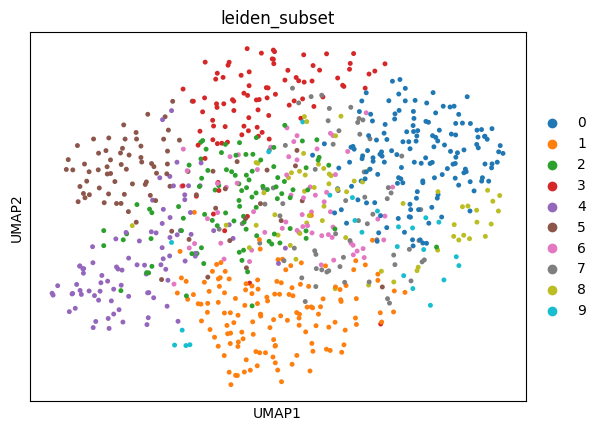

In [4]:
np.random.seed(42)
sc.settings.seed = 42

cdata = cdata[cell_ids].copy()

sc.pp.highly_variable_genes(cdata, n_top_genes=2000, flavor="seurat_v3")

sc.pp.normalize_total(cdata)
sc.pp.log1p(cdata)
sc.pp.scale(cdata, max_value=10)

sc.tl.pca(cdata, use_highly_variable=True)
sc.pp.neighbors(cdata, n_neighbors=15, n_pcs=30)
sc.tl.umap(cdata)

# custom umap for subset of cells
cdata.obsm['X_umap_subset'] = cdata.obsm['X_umap'].copy()

sc.tl.leiden(cdata, resolution=1, key_added='leiden_subset')
sc.pl.umap(cdata, color=['leiden_subset'], size=50)

In [5]:
from slingshot_simple import (
    analyze_gene_expression_along_trajectories,
    direct_slingshot_analysis
)

In [6]:
results = direct_slingshot_analysis(
    cdata,
    start_cluster='0',
    cluster_key='leiden_subset',
    embedding_key='X_umap_subset'
)

=====Direct Slingshot Analysis=====
Start cluster: 0
Cluster key: leiden_subset
Embedding key: X_umap_subset
End clusters: Auto-determined by Slingshot
Start cluster size: 154 cells
Running Slingshot analysis...
Successfully imported R packages.
Creating temporary files...
Reading data and running analysis in R...
Found 4 trajectories
Reading results...
Slingshot analysis completed! Found 4 trajectories
Analysis completed successfully!
Found 4 trajectories
  Trajectory_1: 475 cells (55.2% coverage)
  Trajectory_2: 518 cells (60.2% coverage)
  Trajectory_3: 460 cells (53.5% coverage)
  Trajectory_4: 405 cells (47.1% coverage)

Analyzing cluster transitions...
Found lineages data: {'Lineage1': [0, 8, 7, 6, 2, 4], 'Lineage2': [0, 8, 7, 6, 2, 3], 'Lineage3': [0, 8, 7, 6, 2, 5], 'Lineage4': [0, 8, 7, 9, 1]}
Trajectory_1: 0 → 8 → 7 → 6 → 2 → 4
Trajectory_2: 0 → 8 → 7 → 6 → 2 → 3
Trajectory_3: 0 → 8 → 7 → 6 → 2 → 5
Trajectory_4: 0 → 8 → 7 → 9 → 1


In [7]:
results

[{'path': [0, 8, 7, 6, 2, 4],
  'pseudotime': [1.7763198175591806,
   3.3619147641315688,
   3.6256762270422485,
   4.450362668626078,
   5.505463822723492,
   7.525790644874352]},
 {'path': [0, 8, 7, 6, 2, 3],
  'pseudotime': [5.503455859187122,
   3.539899313741773,
   4.847499568982458,
   4.756338369534948,
   5.240178901032851,
   6.926711715874836]},
 {'path': [0, 8, 7, 6, 2, 5],
  'pseudotime': [1.7154226405159279,
   3.382561411906741,
   3.62814066896097,
   4.467815068983038,
   5.381989956715526,
   7.097001467484337]},
 {'path': [0, 8, 7, 9, 1],
  'pseudotime': [1.5853320424859967,
   2.5201173479672083,
   3.579931400117393,
   3.8733923570965274,
   5.807229936488067]}]